# Project Part 1
[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/glaframb71/CS39AA-Project/blob/main/39aa-project.ipynb)

## 1. Introduction/Background

<font size ="3">For my 39AA Project, I plan to use a dataset related to sports analytics to gain hands-on experience working with data in the world of sports. With the guidance of Professor Geinitz, we successfully located a Kaggle competition called NFL Big Data Bowl 2024, which is hosted by The National Football League. This competition offers multiple CSV files that contain a wide range of data from the 2022 NFL season. One of these datasets specifically focuses on NFL players who participated in the 2022 season, providing information such as their NFL ID, height, weight, birthdate, college, and position.</font>

<font size ="3">Using this NFL Players dataset, my objective is to predict a player's position based on their height, weight, and college. This task falls under the domain of Natural Language Processing (NLP) and specifically involves text classification. Text classification in NLP refers to the process of assigning predefined categories or labels to textual information based on its content. In this case, the textual information consists of the player's height, weight, and college, and the goal is to classify this information into specific positions such as quarterback, running back, corner back, defensive tackle, and so on.</font>


## 2. Exploratory Data Analysis
<font size ="3">Now that we know what dataset is being used, where it came from, and what kind of NLP task we are looking to accomplish, let's perform some exploratory data analysis to get a better idea of what this player data looks like. In order to do that, we need to import some modules/packages that we will need to execture our exploratory data analysis.</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
stopwords = ["dType", "Name", "Length", "collegeName", "object"]

<font size ="3">The modules/packages that we may need have now been imported. Next, we need to load the players dataset and examine the first 10 entries to get a visual representation of our data. This will help us better understand the structure and content of the dataset. We can utilize the pandas package, which we imported as pd earlier, to create our players dataframe.</font>

In [2]:
playersDataUrl = "https://raw.githubusercontent.com/glaframb71/CS39AA-Project/main/data/players.csv"
playersData = pd.read_csv(playersDataUrl)

playersData.head(10)

,nflId,height,weight,birthDate,collegeName,position,displayName
0,25511,6-4,225,1977-08-03,Michigan,QB,Tom Brady
1,29550,6-4,328,1982-01-22,Arkansas,T,Jason Peters
2,29851,6-2,225,1983-12-02,California,QB,Aaron Rodgers
3,30842,6-6,267,1984-05-19,UCLA,TE,Marcedes Lewis
4,33084,6-4,217,1985-05-17,Boston College,QB,Matt Ryan
5,33099,6-6,245,1985-01-16,Delaware,QB,Joe Flacco
6,33107,6-4,315,1985-08-30,Virginia Tech,T,Duane Brown
7,33130,5-10,175,1986-12-01,California,WR,DeSean Jackson
8,33131,6-8,300,1986-09-01,Miami,DE,Calais Campbell
9,33138,6-3,222,1985-07-02,Michigan,QB,Chad Henne


<font size ="3">Great! The dataset has been successfully loaded into the notebook. However, we need to perform some data cleaning to display only the columns that are relevant to us. Just to recap, the columns we are interested in are height, weight, collegeName, and position. We will also take a peak at the first 10 entries of the newly cleaned up data.</font>

In [3]:
players = playersData[['height', 'weight', 'collegeName', 'position']]

players.head(10)

,height,weight,collegeName,position
0,6-4,225,Michigan,QB
1,6-4,328,Arkansas,T
2,6-2,225,California,QB
3,6-6,267,UCLA,TE
4,6-4,217,Boston College,QB
5,6-6,245,Delaware,QB
6,6-4,315,Virginia Tech,T
7,5-10,175,California,WR
8,6-8,300,Miami,DE
9,6-3,222,Michigan,QB


In [4]:
players.loc[:, 'height_inches'] = players['height'].apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]))

height_index = players.columns.get_loc('height')

# Insert the "height_inches" column next to the "height" column
players.insert(height_index + 1, "height_inches", players.pop("height_inches"))

/tmp/ipykernel_20/1550116927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players.loc[:, 'height_inches'] = players['height'].apply(lambda x: int(x.split('-')[0]) * 12 + int(x.split('-')[1]))


In [5]:
players.head(10)

,height,height_inches,weight,collegeName,position
0,6-4,76,225,Michigan,QB
1,6-4,76,328,Arkansas,T
2,6-2,74,225,California,QB
3,6-6,78,267,UCLA,TE
4,6-4,76,217,Boston College,QB
5,6-6,78,245,Delaware,QB
6,6-4,76,315,Virginia Tech,T
7,5-10,70,175,California,WR
8,6-8,80,300,Miami,DE
9,6-3,75,222,Michigan,QB


<font size ="3">Perfect! Our data has been cleaned up to only include the columns that are relevant to our task. Now, it's time to explore the dataset further by visualizing it with graphs. Let's begin by analyzing the "weights" column to identify the most frequently occurring weights in our players dataset. We will do this by utilizing the matplotlib.pyplot module we imported earlier.</font>

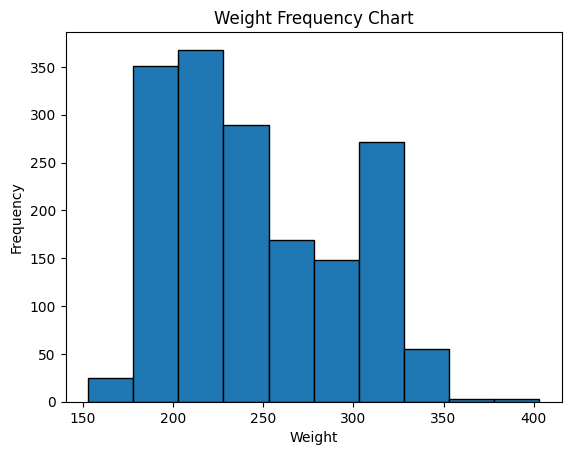

In [6]:
weights = players['weight'].tolist()

bins = range(min(weights), max(weights) + 26, 25)
plt.hist(weights, bins=bins, edgecolor='black')

plt.title("Weight Frequency Chart")
plt.xlabel("Weight")
plt.ylabel("Frequency")

plt.show()

<font size ="3">After successfully creating a frequency table, we now have a visual representation of the weights of the players who populate the dataset. To read the graph, I grouped the weights into ranges of 25. With that being said, we can observe that our most frequent weight group is between 200-224 pounds, with a frequency of just above 350.</font>

<font size ="3">Now, let's obtain a visual representation of the different heights of the players in our dataset. To accomplish this, we can create a bar plot using the Seaborn package to compare the height values and determine the most common height.</font>

<Axes: >

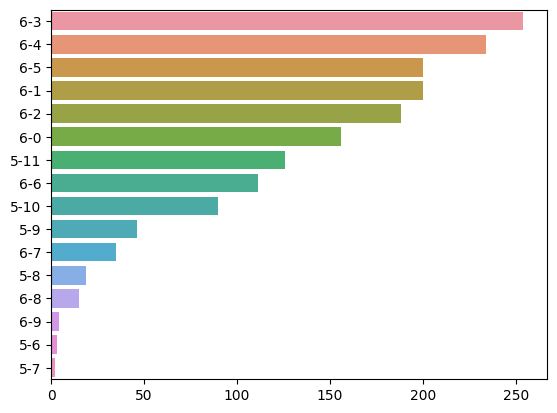

In [7]:
heights = players['height'].str.split()
heights = heights.tolist()
heightsGathered=[word for i in heights for word in i]

from collections import Counter
heightCounter=Counter(heightsGathered)
heightMost=heightCounter.most_common()

x, y = [], []
for word, count in heightMost:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)

<font size ="3">Upon creating the height bar plot, we can make some observations about the most and least common height values. The top three most common heights are 6-3, 6-4, and 6-5, respectively, while the bottom three least common heights are 6-9, 5-6, and 5-7.</font>

<font size ="3">While we're at it, let's continue the bar plot trend by creating two more plots for the colleges and positions of the players in the dataset. Let's start with the colleges and see which universities are the most common in the dataset.</font>

<Axes: >

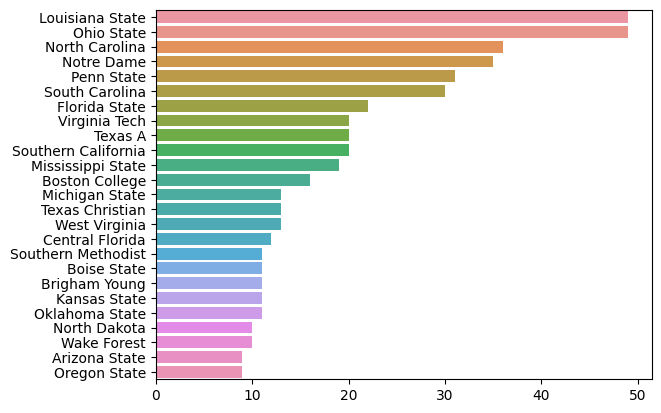

In [8]:
colleges = players['collegeName'].str.findall(r'\b\w+\s\w+\b')
colleges = colleges.tolist()
collegesGathered=[word for i in colleges for word in i]

collegeCounter=Counter(collegesGathered)
collegeMost=collegeCounter.most_common()

x, y = [], []
for word, count in collegeMost[:25]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)

<font size ="3">While creating the bar plot to visually represent the different colleges, I decided to limit the graph to the top 25 most common colleges to prevent overcrowding. That being said, we can observe that the most common colleges in the dataset appear to be a tie between Louisiana State and Ohio State with both just about reaching 50 players.</font>

<font size ="3">With the college bar plot completed, let's now create the position bar plot that we mentioned earlier. Following the same trend as the last two bar plots, we will create this bar plot with the intention of finding the most common position in the dataset.</font>

<Axes: >

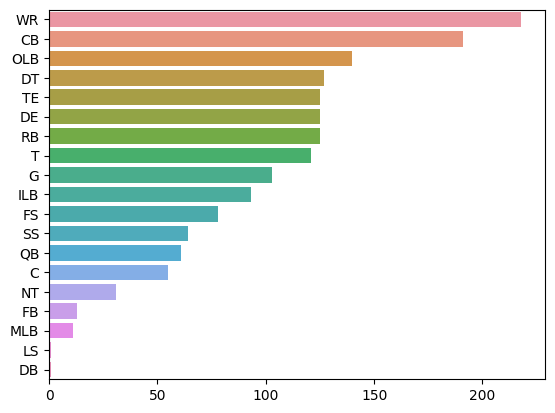

In [9]:
positions = players['position'].str.split()
positions = positions.tolist()
positionsGathered=[word for i in positions for word in i]

positionCounter=Counter(positionsGathered)
positionMost=positionCounter.most_common()

x, y = [], []
for word, count in positionMost:
    if (word not in stopwords):
        x.append(word)
        y.append(count)

sns.barplot(x=y, y=x)

<font size ="3">With this latest bar plot, we can observe that the most common position in the data set is wide reciever with just over 250 entries in the dataset. With the least common position coming out to be long snapper and defensive back. Another interesting detail that I notice is we are missing kicker and punter from the graph.</font>

<font size ="3">Now that we know the most common value for each attribute we will use to predict positions based on height, weight, and college, let's complete our exploratory data analysis by creating violin plots to visualize the distribution of each attribute by player position.</font>

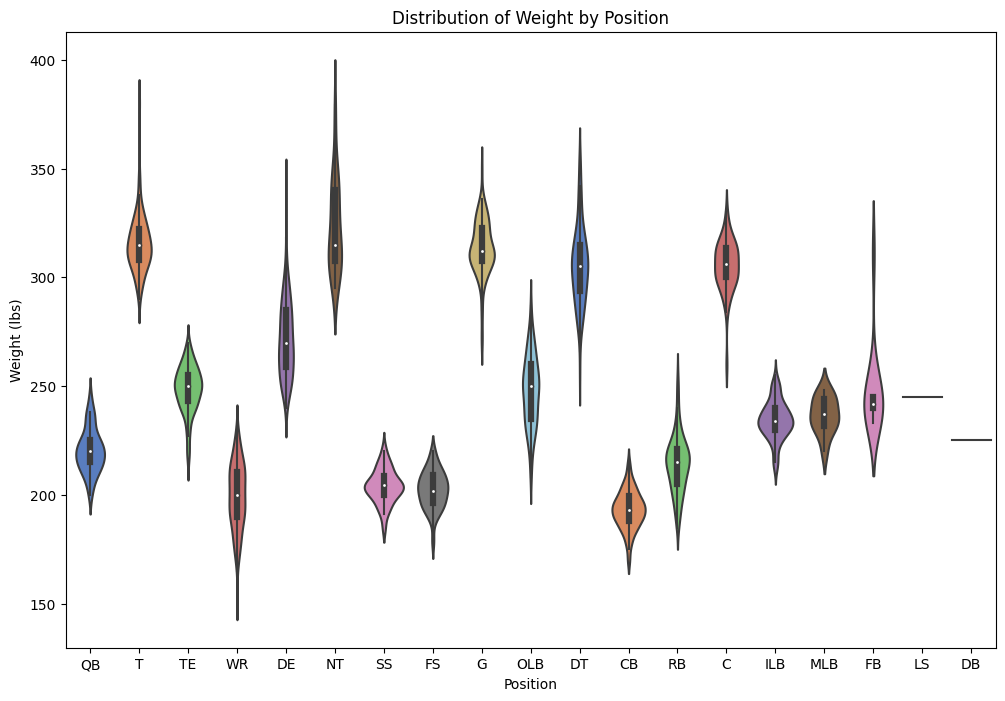

In [10]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='position', y='weight', data=players, palette='muted')
plt.title('Distribution of Weight by Position')
plt.xlabel('Position')
plt.ylabel('Weight (lbs)')
plt.show()

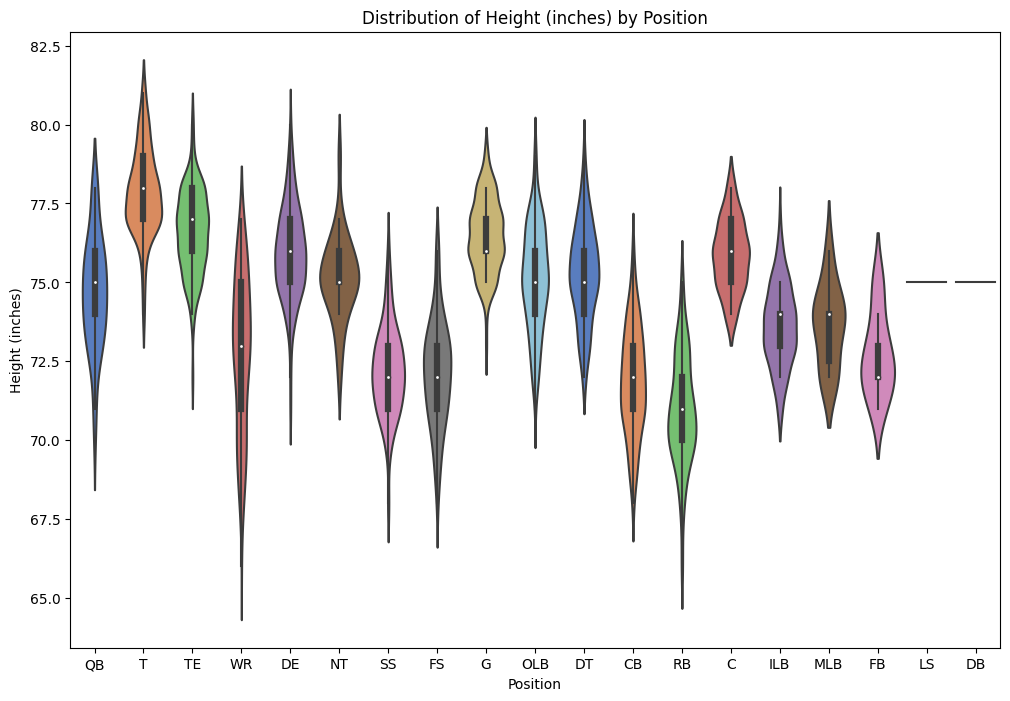

In [11]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='position', y='height_inches', data=players, palette='muted')
plt.title('Distribution of Height (inches) by Position')
plt.xlabel('Position')
plt.ylabel('Height (inches)')
plt.show()


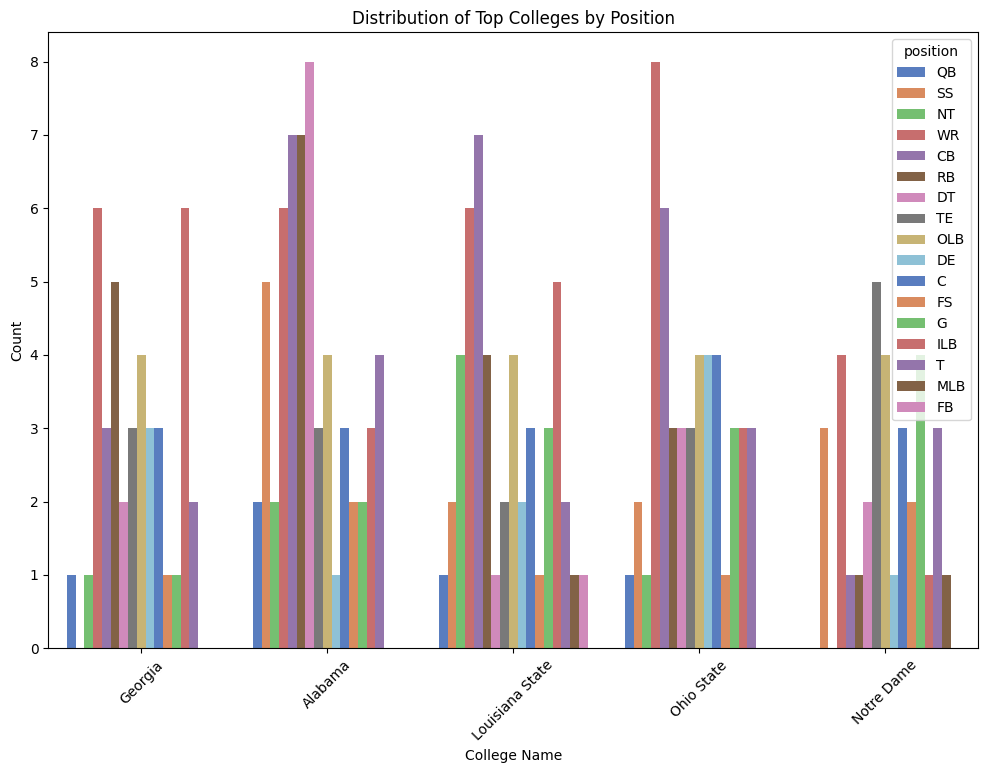

In [12]:
# Get the top N most common colleges
top_colleges = players['collegeName'].value_counts().nlargest(5).index

# Filter the data for the top colleges
top_colleges_data = players[players['collegeName'].isin(top_colleges)]

custom_palette = {"QB": "skyblue", "WR": "lightgreen", "TE": "lightcoral", "T": "orange", "DE": "lightblue"}

# Create a count plot for the top colleges based on position
plt.figure(figsize=(12, 8))
sns.countplot(x='collegeName', hue='position', data=top_colleges_data, palette='muted')
plt.title('Distribution of Top Colleges by Position')
plt.xlabel('College Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



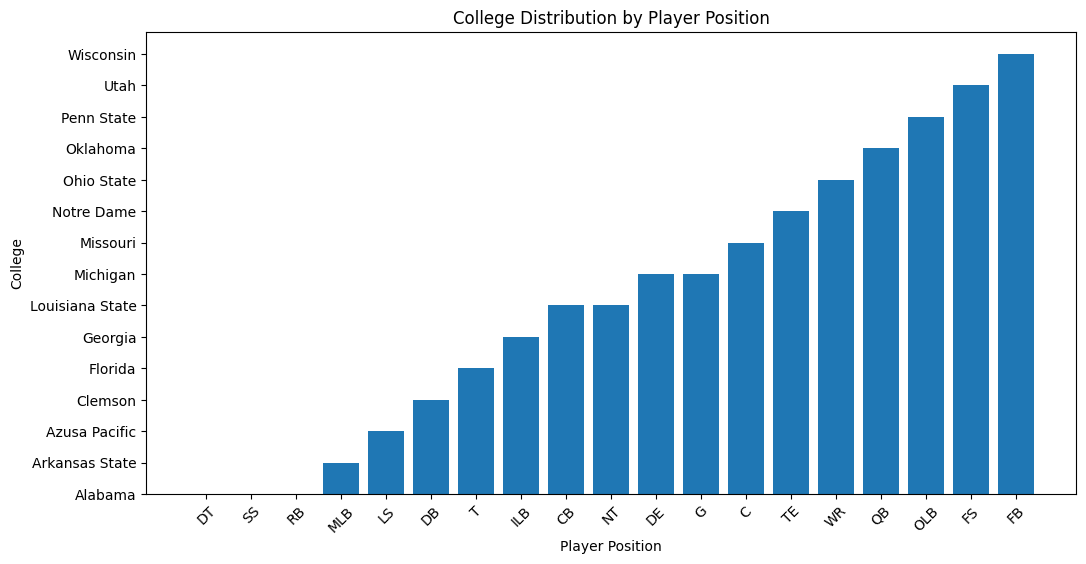

In [13]:
position_colleges = players.groupby('position')['collegeName'].agg(lambda x: x.value_counts().index[0]).reset_index()

position_colleges = position_colleges.sort_values('collegeName')

plt.figure(figsize=(12, 6))
plt.bar(position_colleges['position'], position_colleges['collegeName'])
plt.xlabel('Player Position')
plt.ylabel('College')
plt.title('College Distribution by Player Position')
plt.xticks(rotation=45)
plt.show()

<font size="3">With our exploratory data analysis complete, we now have a better visual and deeper understanding of the dataset used to predict a player's position based on their height, weight, and college. We examined the most common values for weight, height, college, and position among all the entries in the dataset. Finally, we concluded the analysis by examining the distribution of each attribute by player position, which may provide insights into how we can predict each position more accurately.</font>